# Proyecto 03 - Series de Tiempo

## GITHUB

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### 1. Preparación del Dataset

Importamos las librerias a utilizae en el notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
import datetime as dt

import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import acf, pacf
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.tree import DecisionTreeRegressor

In [2]:
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')

In [3]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [4]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


In [5]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [6]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [7]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [8]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [9]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


##### Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**


In [10]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
80,2019-01-01,2,Martes,Centro,Liviano,537
86,2019-01-01,2,Martes,Centro,Pesado,1
88,2019-01-01,2,Martes,Provincia,Liviano,443
94,2019-01-01,2,Martes,Provincia,Pesado,1
149,2019-01-01,3,Martes,Centro,Liviano,769


In [11]:
dataset.shape

(238869, 6)

In [12]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [13]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


se hace respaldos de los datos originales para un posterior uso

In [14]:
orignal=dataset.copy()

In [15]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
1,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00
2,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
3,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
4,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
...,...,...,...,...,...
238864,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238865,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238866,Martes,Centro,Liviano,580,2019-12-31 22:00:00
238867,Martes,Centro,Liviano,214,2019-12-31 23:00:00


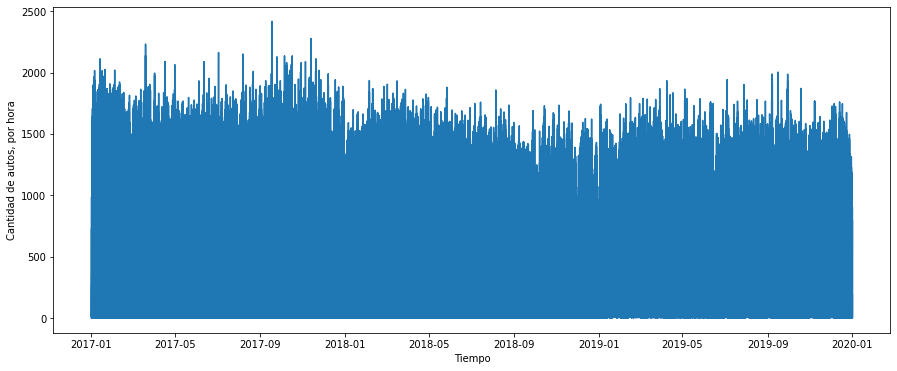

In [16]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

* En este grafico podemos ver el paso vehicular por dias.

 Resampleamos nuestros datos para agrupar por dia y se logra una mejor visualizacion.
Los datos son ordenados cronologicamente, se muestra la cantidad de autos que pasaron por día. 
Se toma solo el dato Illia y pago en efectivo.

In [17]:
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

* Se agrupa la variable dia y se cuentan la cantidad de registros.

In [18]:
dias=dataset.groupby('dia')
cantidad=dias.dia.count()


Text(0, 0.5, 'Cantidad de pasos por peaje')

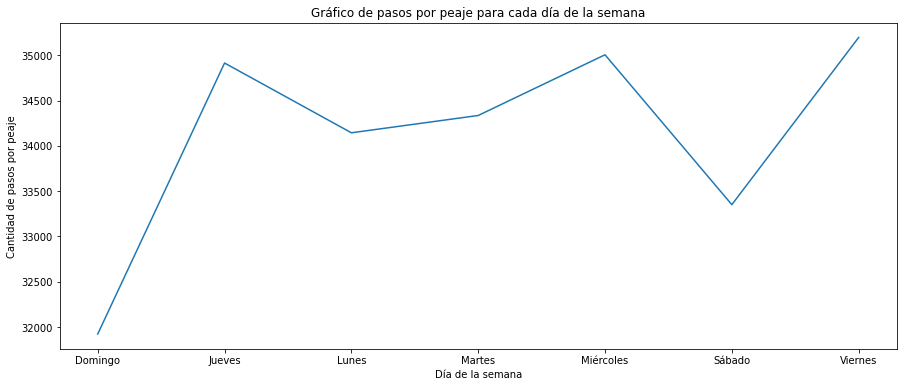

In [19]:
cantidad.plot(figsize=(15,6))
plt.legend().remove()
plt.title('Gráfico de pasos por peaje para cada día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad de pasos por peaje')

### Pregunta 1:

* Que dia de la semana tuvo mayor cantidad de autos? 

El dia de mayor flujo vehicular segun la grafica anterior fue el viernes, con mas de 35000 vehiculos.

In [20]:
#Se le extrae a la dato fecha la hora y se anexa como una columna nueva.
dataset["hour"] = dataset["fecha"].dt.hour
dataset

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha,hour
0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00,0
1,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00,0
2,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00,0
3,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00,0
4,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00,0
...,...,...,...,...,...,...
238864,Martes,Provincia,Liviano,556,2019-12-31 22:00:00,22
238865,Martes,Provincia,Pesado,1,2019-12-31 22:00:00,22
238866,Martes,Centro,Liviano,580,2019-12-31 22:00:00,22
238867,Martes,Centro,Liviano,214,2019-12-31 23:00:00,23


In [21]:
#Se agrupa las columnas fecha, dia, hora y cantidad_pasos, se le calcula la media.
trafico_prom = dataset.groupby(["fecha","dia","hour"])["cantidad_pasos"].agg("mean")
trafico_prom = trafico_prom.reset_index()
trafico_prom

,fecha,dia,hour,cantidad_pasos
0,2017-01-01 00:00:00,Domingo,0,131.333333
1,2017-01-01 01:00:00,Domingo,1,1.000000
2,2017-01-01 02:00:00,Domingo,2,229.000000
3,2017-01-01 03:00:00,Domingo,3,289.000000
4,2017-01-01 04:00:00,Domingo,4,178.142857
...,...,...,...,...
26097,2019-12-31 19:00:00,Martes,19,304.250000
26098,2019-12-31 20:00:00,Martes,20,343.500000
26099,2019-12-31 21:00:00,Martes,21,568.666667
26100,2019-12-31 22:00:00,Martes,22,284.750000


In [22]:
#Se crea un filtro.
trafico_prom = trafico_prom[trafico_prom["fecha"] >= "2017-01-01"][["dia","hour","cantidad_pasos"]]
trafico_prom

,dia,hour,cantidad_pasos
0,Domingo,0,131.333333
1,Domingo,1,1.000000
2,Domingo,2,229.000000
3,Domingo,3,289.000000
4,Domingo,4,178.142857
...,...,...,...
26097,Martes,19,304.250000
26098,Martes,20,343.500000
26099,Martes,21,568.666667
26100,Martes,22,284.750000


In [23]:
#Se crea un pivot_table para calcular la cantidad_pasos por dia y por hora. 
paso_dia_hora = trafico_prom.pivot_table(values="cantidad_pasos", index = "dia", columns="hour")
paso_dia_hora


hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dia,,,,,,,,,,,,,,,,,,,,,
Domingo,154.636681,166.118293,150.137739,119.824970,83.722393,75.439817,104.759235,138.535853,157.724913,163.640818,...,305.498796,269.621752,282.223226,314.306528,340.852717,349.629611,335.602775,304.961752,252.430098,200.029504
Jueves,127.458630,105.067812,62.595609,39.440318,32.804923,47.434639,99.324469,208.720831,317.101862,341.467541,...,378.755471,381.848238,387.084163,385.920304,403.833776,392.016305,332.683985,284.226620,221.464953,170.471136
Lunes,109.331010,113.165022,71.801678,52.053107,42.100865,57.092488,109.367994,210.970354,295.244043,312.877923,...,345.626920,340.636936,346.948712,353.014602,371.493908,366.834398,298.987954,247.042532,198.163104,154.959668
Martes,116.353745,88.316987,54.470599,37.926692,34.846062,48.359232,96.574337,203.148995,304.192838,333.207187,...,363.888892,362.223026,361.954780,362.230937,381.879034,377.153353,309.514990,268.346705,208.347194,157.780633
Miércoles,123.352374,92.620229,57.711691,41.642666,35.882167,49.341197,99.200313,205.144010,308.598480,341.454892,...,363.170980,362.339097,371.441555,370.524497,389.807659,381.485084,317.196190,273.049968,217.872267,165.764000
Sábado,167.424951,144.788201,112.720002,83.986324,61.778086,69.716200,104.269552,156.841074,204.821450,246.016574,...,354.621673,325.140179,312.987350,313.236555,317.858961,324.401354,326.281852,319.640862,285.111981,205.652769
Viernes,160.139084,113.692152,74.664865,47.954968,40.726948,54.656270,103.650128,206.689982,308.163007,334.743210,...,392.157371,389.700910,389.401447,390.536862,393.936517,383.210147,341.045899,321.972290,273.721410,202.617716


### Pregunta 2:

* Cuantos autos pasaron por dia y por hora en el peaje Illia? 
* Se hace un pivot_table nos arroja los datos donde se evidencia que el día que mas pasaron autos son los viernes a las 6 de la tarde.

## Componentes de la serie de tiempo

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

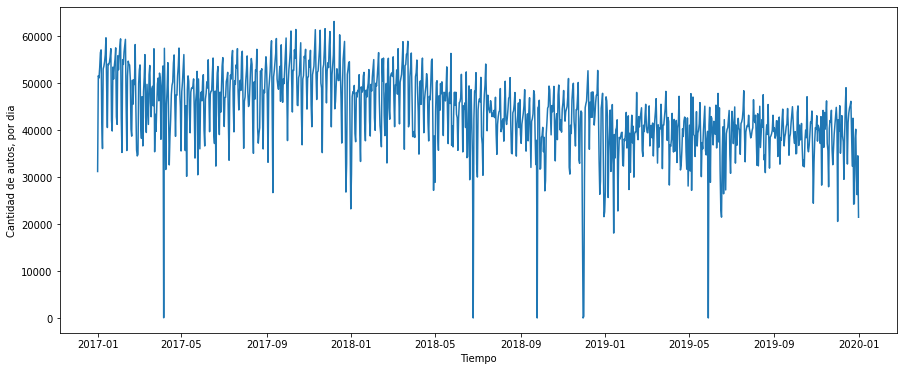

In [24]:
#Se grafica la serie de tiempo peaje Illia con la cantidad de pasos por año y por día.
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

* Se evidencia datos atipicos en la serie que deben ser tratados.

In [25]:
#se filtra de nuevo el dataframe.
diario[diario.cantidad_pasos < 20000]

,cantidad_pasos
fecha,
2017-04-06,40
2018-06-25,0
2018-09-25,0
2018-11-29,19728
2018-11-30,0
2018-12-01,350
2019-01-13,18076
2019-05-29,0


In [26]:
#Se promediaron el dia anterior y el dia despues para imputar datos.
diario.loc['2017-04-06'] = (diario.loc['2017-04-05'] + diario.loc['2017-04-06']) / 2
diario.loc['2018-11-29'] = (diario.loc['2018-11-28'] + diario.loc['2018-11-29']) / 2
diario.loc['2018-12-01'] = (diario.loc['2018-11-30'] + diario.loc['2018-12-02']) / 2
diario.loc['2019-01-13'] = (diario.loc['2019-01-12'] + diario.loc['2019-01-14']) / 2


In [27]:
# Analizamos la cantidad de días en los que no hubo pasos por dicha cabina.

diario[diario['cantidad_pasos']==0]

,cantidad_pasos
fecha,
2018-06-25,0.0
2018-09-25,0.0
2018-11-30,0.0
2019-05-29,0.0


* Estos datos corresponden a datos atipicos evidenciados en la grafica donde encontramos huelgas, paros y feriados en Argentina.

In [28]:
# Definimos el modelo que utilizaremos para imputar los valores que estan en 0.

imputer = SimpleImputer(missing_values=0, strategy='mean')

In [29]:
# Imputamos los valores iguales a 0.

diario.cantidad_pasos =imputer.fit_transform(diario['cantidad_pasos'].values.reshape(-1,1))[:,0]

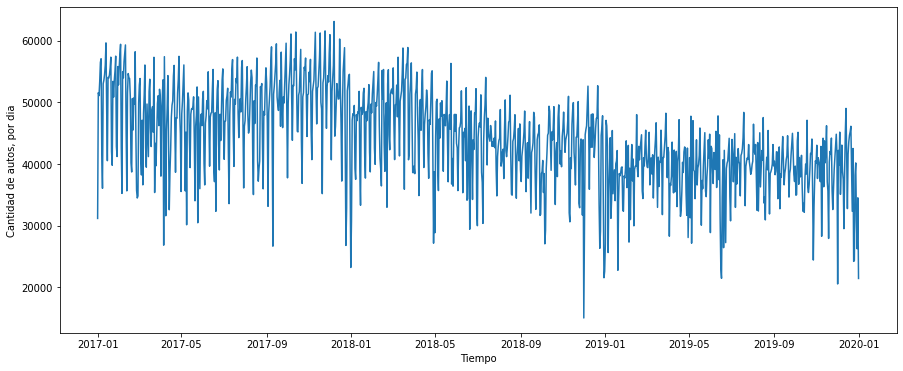

In [30]:
#Graficamos de nuevo despues de tratar los valores atipicos.
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

* Despues de tratar los datos atipicos se puede evidenciar datos mas homogeneos, pero sigue siendo no estacionaria. 

In [31]:
def test_stationarity(timeseries,value_field,window_value=3):
    
    #Determing rolling statistics
    
    rolmean = timeseries[[value_field]].rolling(window=window_value, center = False).mean()
    rolstd = timeseries[[value_field]].rolling(window=window_value, center = False).std()

    #Plot rolling statistics:
    plt.figure(figsize=(18,8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

* Se crea una funcion que nos calcula el Dickey-Fuller cada que necesitemos llamarlo.

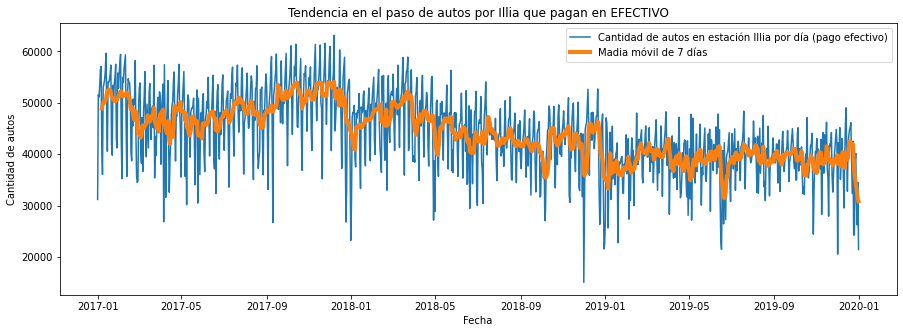

In [32]:
# Se calcula  el promedio de los últimos 7 días, para generar una media móvil de 7 periodos = a una semana.


ventana = 7
diario_promedio_tendencia = diario.cantidad_pasos.rolling(window=ventana).mean()
diario_promedio_tendencia.head(n=2)

# Se grafica la media móvil.

plt.figure(figsize = (15,5))
plt.plot(diario.index, diario.cantidad_pasos, label = 'Cantidad de autos en estación Illia por día (pago efectivo)')
plt.plot(diario_promedio_tendencia, lw = 4, label = 'Madia móvil de 7 días')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de autos')
plt.legend()
plt.title('Tendencia en el paso de autos por Illia que pagan en EFECTIVO')
plt.show()

* En la grafica se observa los datos con el rolling mean . 

### Metodo de Descomposicion: 

* Debemos hacer un seasonal_decompose  para dividir o descomponer los datos en sus componentes estacionales de tendencia y residuales.

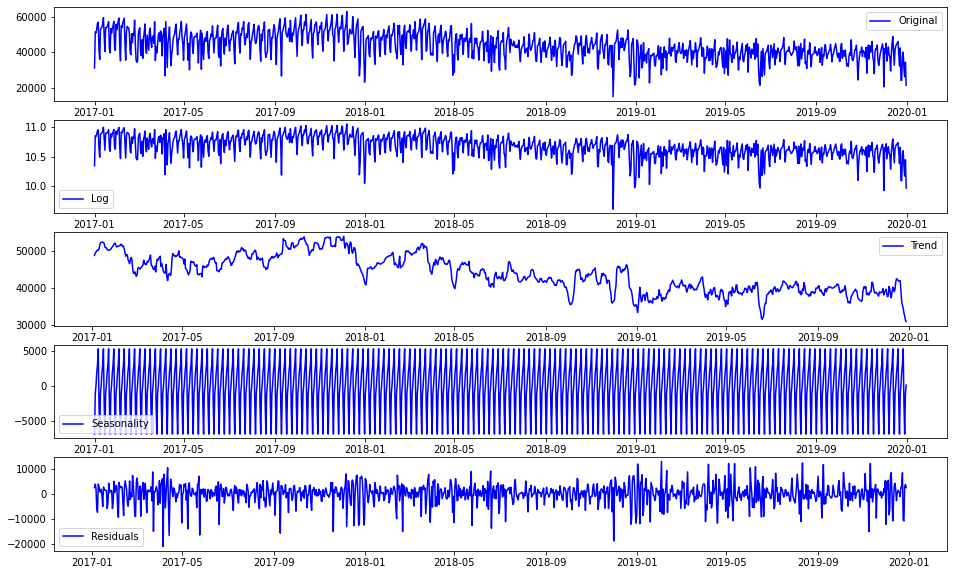

In [33]:
descomposicion = seasonal_decompose(diario)

trend = descomposicion.trend
seasonal = descomposicion.seasonal
residual = descomposicion.resid

plt.figure(figsize=(16,10))
plt.subplot(511)
plt.plot(diario, label='Original', color="blue")
plt.legend(loc='best')
plt.subplot(512)
plt.plot(np.log(diario), label='Log', color="blue")
plt.legend(loc='best')
plt.subplot(513)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.subplot(514)
plt.plot(seasonal, label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(515)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')

* La gráfica muestra que los datos tienen tanto tendencia y estacionalidad. Esto significa que la serie no es estacionaria.

* Uno de los primeros pasos para reducir la tendencia puede ser la transformación. En este caso podemos ver claramente que existe una tendencia negativa. Entonces podemos aplicar transformaciones que penalizan más a los valores más altos que a los más pequeños. Estos pueden ser un logaritmo, una raíz cuadrada, una raíz cúbica, etc. Tomemos aquí una transformación de logaritmo para simplificar:

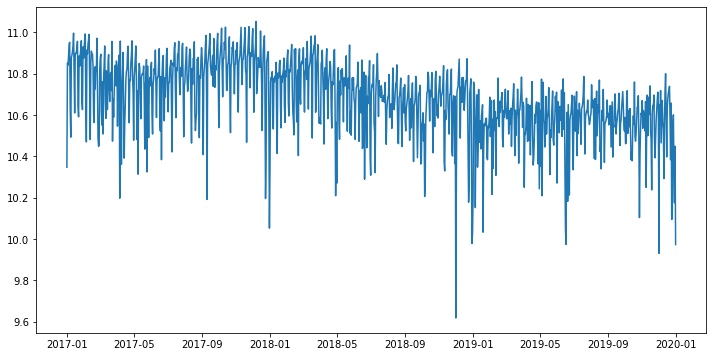

In [34]:
#Se usa el log para convertir en algoritmo la variable diario.
ts_log = np.log(diario)
plt.figure(figsize=(12,6))
plt.plot(ts_log)

* Se hace la misma grafica no estacionaria en una escala logaritmica, para la mejor interpretacion de datos.

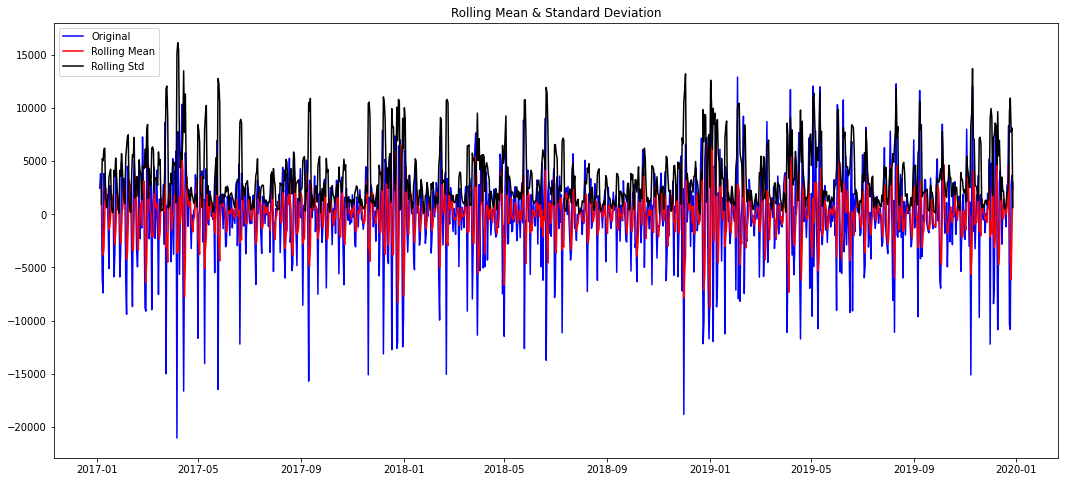

Results of Dickey-Fuller Test:
Test Statistic                -1.376536e+01
p-value                        9.908151e-26
#Lags Used                     2.200000e+01
Number of Observations Used    1.066000e+03
Critical Value (1%)           -3.436499e+00
Critical Value (5%)           -2.864255e+00
Critical Value (10%)          -2.568216e+00
dtype: float64


In [35]:
ts_log_decompose =  pd.DataFrame(residual)
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose,"resid")

* La grafica anterior nos muestra que el p-value es menor a 0.05.
* Test Statistic nos muestra que al compararlo con Critical Value es menor al 1% dando una efectividad del 99%. Se indica que la serie es estacionaria.

### Modelo ARIMA

* ARIMA son las siglas de Auto-Regressive Integrated Moving Averages (Medias móviles Integradas auto-regresivas). El pronóstico ARIMA para una serie de tiempo estacionaria no es más que una ecuación lineal (como una regresión lineal). Los predictores dependen de los parámetros (p, d, q) del modelo ARIMA.

* Función de autocorrelación (ACF): Es una medida de la correlación entre el TS con una versión rezagada de sí mismo. Por    ejemplo, en el retraso 5, ACF compararía series en el instante de tiempo "t1" ... "t2" con series en el instante "t1-5" ... "t2-5" (t1-5 y t2 son puntos finales).

In [36]:
lag_acf = acf(ts_log_decompose, nlags=30)
lag_pacf = pacf(ts_log_decompose, nlags=30, method='ols')

Text(0.5, 1.0, 'Función de autocorrelación')

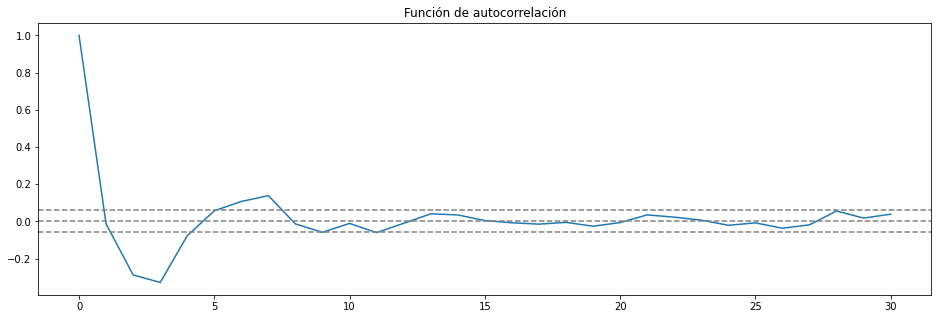

In [37]:
#Plot ACF: 
plt.figure(figsize=(16,5))
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_decompose)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_decompose)),linestyle='--',color='gray')
plt.title('Función de autocorrelación')

* Función de Autocorrelación Parcial (PACF): Mide la correlación entre la serie con una versión desfasada de sí misma pero después de eliminar las variaciones ya explicadas por las comparaciones intervinientes. Por ejemplo, en el desface 5, comprobará la correlación pero eliminará los efectos ya explicados por los desfaces 1 a 4.

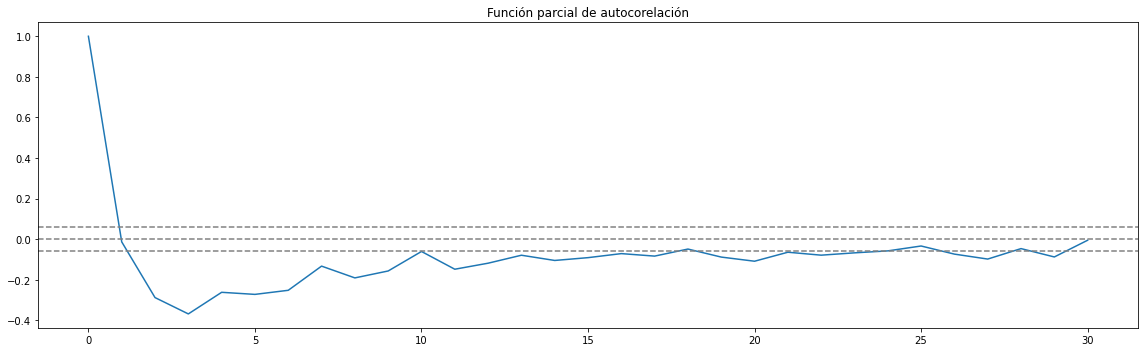

In [38]:
#Plot PACF:
plt.figure(figsize=(16,5))
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_decompose)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_decompose)),linestyle='--',color='gray')
plt.title('Función parcial de autocorelación')
plt.tight_layout()

En esta gráfica, las dos líneas de puntos a ambos lados de 0 son los intervalos de confianza. Estos se pueden utilizar para determinar los valores "p" y "q" como:
* p el valor de retraso en el que el gráfico PACF cruza el intervalo de confianza superior por primera vez. Si observa de cerca, en este caso p = 5.
* q - El valor de retraso en el que el gráfico ACF cruza el intervalo de confianza superior por primera vez. Si observa de cerca, en este caso q = 1.

#### AR Model

calculamos el arima con los parametros encontrados en los graficos pacf y acf

                               SARIMAX Results                                
Dep. Variable:                  resid   No. Observations:                 1089
Model:                 ARIMA(5, 0, 0)   Log Likelihood              -10420.072
Date:                Sun, 05 Dec 2021   AIC                          20854.144
Time:                        23:12:30   BIC                          20889.095
Sample:                    01-04-2017   HQIC                         20867.373
                         - 12-28-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8045     40.822      0.093      0.926     -76.206      83.815
ar.L1         -0.2910      0.025    -11.570      0.000      -0.340      -0.242
ar.L2         -0.4801      0.028    -17.387      0.0

Text(0.5, 1.0, 'RSS: 13048097547.9803')

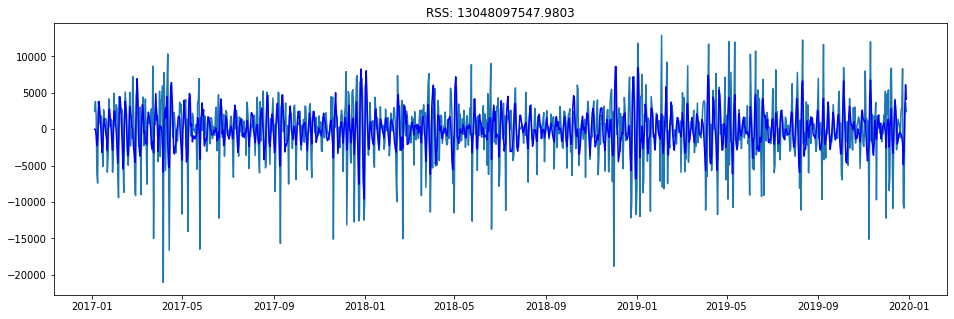

In [39]:
model = ARIMA(ts_log_decompose, order=(5, 0, 0))
results_MA = model.fit()
print(results_MA.summary())

plt.figure(figsize=(16,5))
plt.plot(ts_log_decompose)
plt.plot(results_MA.fittedvalues, color='blue')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_decompose.resid)**2))

* BIC es una generalizacion de AIC, AIC es una metrica que penaliza el uso de variables, entre menor sea AIC mejor, si no estoy penalizando variables el AIC es menor.
* Para este caso las variables nos estan aportando un tipo de valor.

In [40]:
# Se separan los datos en conjuntos de entrenamiento y prueba.

training_data=ts_log_decompose
test_data=ts_log_decompose

In [41]:
# Se generan las predicciones para la cantidad de periodos del conjunto de testeo:

predictions=results_MA.forecast(steps=len(test_data))[0]
predictions

2496.3572401928423

* Nos indica el resultado 2496 pasos por la estacion a futuro.

In [42]:
#traemos los pasos del dataset original
resultado_var_original = diario
resultado_var_original.head()

,cantidad_pasos
fecha,
2017-01-01,31183.0
2017-01-02,51568.0
2017-01-03,51093.0
2017-01-04,53332.0
2017-01-05,56486.0


In [43]:
# Se hace la resta del periodo de 5 dias con shift.
diario['cant_pasos_dif'] = diario['cantidad_pasos'] - diario['cantidad_pasos'].shift(5)
diario.head(2)

,cantidad_pasos,cant_pasos_dif
fecha,,
2017-01-01,31183.0,NaN
2017-01-02,51568.0,NaN


In [44]:
#se calcula la diferencia de los pasos en rangos
resultado_var_original['Shift7'] = resultado_var_original['cantidad_pasos']-resultado_var_original['cant_pasos_dif']
resultado_var_original.head()

,cantidad_pasos,cant_pasos_dif,Shift7
fecha,,,
2017-01-01,31183.0,NaN,NaN
2017-01-02,51568.0,NaN,NaN
2017-01-03,51093.0,NaN,NaN
2017-01-04,53332.0,NaN,NaN
2017-01-05,56486.0,NaN,NaN


In [45]:
#asiganmos la prediccion a todas las instancias
resultado_var_original['predictions'] = predictions
resultado_var_original.head()

,cantidad_pasos,cant_pasos_dif,Shift7,predictions
fecha,,,,
2017-01-01,31183.0,NaN,NaN,2496.35724
2017-01-02,51568.0,NaN,NaN,2496.35724
2017-01-03,51093.0,NaN,NaN,2496.35724
2017-01-04,53332.0,NaN,NaN,2496.35724
2017-01-05,56486.0,NaN,NaN,2496.35724


In [46]:
#sumamos el resultado de la prediccion
resultado_var_original['pred_var_original'] = resultado_var_original['predictions'] + resultado_var_original['Shift7']
resultado_var_original.head()

,cantidad_pasos,cant_pasos_dif,Shift7,predictions,pred_var_original
fecha,,,,,
2017-01-01,31183.0,NaN,NaN,2496.35724,NaN
2017-01-02,51568.0,NaN,NaN,2496.35724,NaN
2017-01-03,51093.0,NaN,NaN,2496.35724,NaN
2017-01-04,53332.0,NaN,NaN,2496.35724,NaN
2017-01-05,56486.0,NaN,NaN,2496.35724,NaN


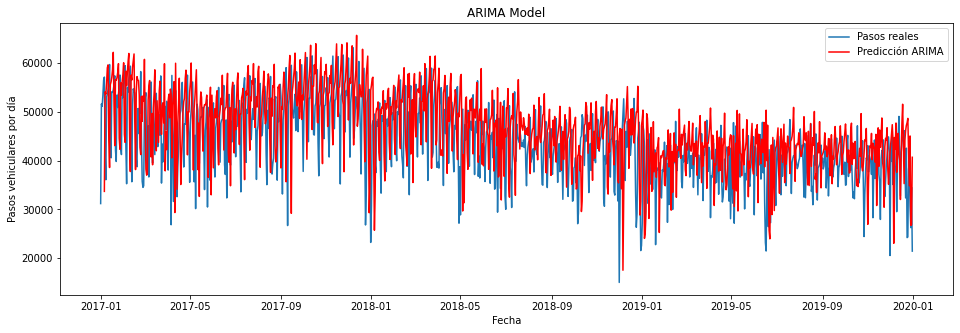

In [47]:
plt.figure(figsize=(16,5))
plt.plot(resultado_var_original['cantidad_pasos'], label='Pasos reales')
plt.plot(resultado_var_original['pred_var_original'], color='red', label='Predicción ARIMA')
plt.title('ARIMA Model')
plt.xlabel('Fecha')
plt.ylabel('Pasos vehiculares por día')
plt.legend()
plt.show()

* graficamos los resultados obtenidos con ARIMA model con respecto a  los valores reales de pasos por día.

# Predicción a futuro

* A continuación se utilizan varios métodos para realizar las predicciones de pasos diarios por Autopista Illia y con pago en efectivo.

## Transformaciones: 
Haz todas las transformaciones de datos que consideres necesarias. Justifica.

In [48]:
#traemos el dataset original
orignal

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00
...,...,...,...,...,...
1372316,Domingo,Provincia,Pesado,8,2017-12-31 22:00:00
1372319,Domingo,Provincia,Liviano,8,2017-12-31 23:00:00
1372320,Domingo,Provincia,Liviano,148,2017-12-31 23:00:00
1372324,Domingo,Provincia,Pesado,1,2017-12-31 23:00:00


In [49]:
#agrupamos por los campos fecha, dia, sentido, y tipo de vehiculo y sumamos la cantidad de pasos
data = orignal.groupby(["fecha","dia","sentido","tipo_vehiculo"])["cantidad_pasos"].sum().reset_index()
data

,fecha,dia,sentido,tipo_vehiculo,cantidad_pasos
0,2017-01-01 00:00:00,Domingo,Centro,Liviano,880
1,2017-01-01 00:00:00,Domingo,Centro,Pesado,33
2,2017-01-01 00:00:00,Domingo,Provincia,Liviano,653
3,2017-01-01 00:00:00,Domingo,Provincia,Pesado,10
4,2017-01-01 01:00:00,Domingo,Centro,Liviano,1
...,...,...,...,...,...
104027,2019-12-31 22:00:00,Martes,Centro,Pesado,2
104028,2019-12-31 22:00:00,Martes,Provincia,Liviano,556
104029,2019-12-31 22:00:00,Martes,Provincia,Pesado,1
104030,2019-12-31 23:00:00,Martes,Centro,Liviano,214


In [50]:
#iniciamos el indice del dataset
data.reset_index(drop = True, inplace = True)
data

,fecha,dia,sentido,tipo_vehiculo,cantidad_pasos
0,2017-01-01 00:00:00,Domingo,Centro,Liviano,880
1,2017-01-01 00:00:00,Domingo,Centro,Pesado,33
2,2017-01-01 00:00:00,Domingo,Provincia,Liviano,653
3,2017-01-01 00:00:00,Domingo,Provincia,Pesado,10
4,2017-01-01 01:00:00,Domingo,Centro,Liviano,1
...,...,...,...,...,...
104027,2019-12-31 22:00:00,Martes,Centro,Pesado,2
104028,2019-12-31 22:00:00,Martes,Provincia,Liviano,556
104029,2019-12-31 22:00:00,Martes,Provincia,Pesado,1
104030,2019-12-31 23:00:00,Martes,Centro,Liviano,214


In [51]:
#visualizamos el dataset
data

,fecha,dia,sentido,tipo_vehiculo,cantidad_pasos
0,2017-01-01 00:00:00,Domingo,Centro,Liviano,880
1,2017-01-01 00:00:00,Domingo,Centro,Pesado,33
2,2017-01-01 00:00:00,Domingo,Provincia,Liviano,653
3,2017-01-01 00:00:00,Domingo,Provincia,Pesado,10
4,2017-01-01 01:00:00,Domingo,Centro,Liviano,1
...,...,...,...,...,...
104027,2019-12-31 22:00:00,Martes,Centro,Pesado,2
104028,2019-12-31 22:00:00,Martes,Provincia,Liviano,556
104029,2019-12-31 22:00:00,Martes,Provincia,Pesado,1
104030,2019-12-31 23:00:00,Martes,Centro,Liviano,214


In [52]:
# organizamos las fechas en campos distintos
data["day_num"] = data.fecha.dt.day # Dia
data["month_num"] = data.fecha.dt.month # Mes
data["year_num"] = data.fecha.dt.year # Año
data

,fecha,dia,sentido,tipo_vehiculo,cantidad_pasos,day_num,month_num,year_num
0,2017-01-01 00:00:00,Domingo,Centro,Liviano,880,1,1,2017
1,2017-01-01 00:00:00,Domingo,Centro,Pesado,33,1,1,2017
2,2017-01-01 00:00:00,Domingo,Provincia,Liviano,653,1,1,2017
3,2017-01-01 00:00:00,Domingo,Provincia,Pesado,10,1,1,2017
4,2017-01-01 01:00:00,Domingo,Centro,Liviano,1,1,1,2017
...,...,...,...,...,...,...,...,...
104027,2019-12-31 22:00:00,Martes,Centro,Pesado,2,31,12,2019
104028,2019-12-31 22:00:00,Martes,Provincia,Liviano,556,31,12,2019
104029,2019-12-31 22:00:00,Martes,Provincia,Pesado,1,31,12,2019
104030,2019-12-31 23:00:00,Martes,Centro,Liviano,214,31,12,2019


In [53]:
#calculamos los dias de las semana
data["dia_sem"] = data.fecha.dt.weekday
data["fin_sem"] = data.fecha.dt.weekday
data

,fecha,dia,sentido,tipo_vehiculo,cantidad_pasos,day_num,month_num,year_num,dia_sem,fin_sem
0,2017-01-01 00:00:00,Domingo,Centro,Liviano,880,1,1,2017,6,6
1,2017-01-01 00:00:00,Domingo,Centro,Pesado,33,1,1,2017,6,6
2,2017-01-01 00:00:00,Domingo,Provincia,Liviano,653,1,1,2017,6,6
3,2017-01-01 00:00:00,Domingo,Provincia,Pesado,10,1,1,2017,6,6
4,2017-01-01 01:00:00,Domingo,Centro,Liviano,1,1,1,2017,6,6
...,...,...,...,...,...,...,...,...,...,...
104027,2019-12-31 22:00:00,Martes,Centro,Pesado,2,31,12,2019,1,1
104028,2019-12-31 22:00:00,Martes,Provincia,Liviano,556,31,12,2019,1,1
104029,2019-12-31 22:00:00,Martes,Provincia,Pesado,1,31,12,2019,1,1
104030,2019-12-31 23:00:00,Martes,Centro,Liviano,214,31,12,2019,1,1


In [54]:
#convertimos las variables categoricas a numericas
features = ["dia","tipo_vehiculo"]
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse = False).fit(data[features])
label_names = list(ohe.get_feature_names())


In [55]:
#iniciamos el indice
ohe_df = pd.DataFrame(ohe.transform(data[features]), columns = label_names)
ohe_df = ohe_df.set_index(keys = data.index)

In [56]:
#unimos las columnas
data = data.join(ohe_df, on = data.index)
data[label_names] = data[label_names].astype(dtype = "int")

In [57]:
#borramos las categoricas
data= data.drop(['dia','sentido','tipo_vehiculo'], axis=1)
data

,fecha,cantidad_pasos,day_num,month_num,year_num,dia_sem,fin_sem,x0_Domingo,x0_Jueves,x0_Lunes,x0_Martes,x0_Miércoles,x0_Sábado,x0_Viernes,x1_Liviano,x1_Pesado
0,2017-01-01 00:00:00,880,1,1,2017,6,6,1,0,0,0,0,0,0,1,0
1,2017-01-01 00:00:00,33,1,1,2017,6,6,1,0,0,0,0,0,0,0,1
2,2017-01-01 00:00:00,653,1,1,2017,6,6,1,0,0,0,0,0,0,1,0
3,2017-01-01 00:00:00,10,1,1,2017,6,6,1,0,0,0,0,0,0,0,1
4,2017-01-01 01:00:00,1,1,1,2017,6,6,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104027,2019-12-31 22:00:00,2,31,12,2019,1,1,0,0,0,1,0,0,0,0,1
104028,2019-12-31 22:00:00,556,31,12,2019,1,1,0,0,0,1,0,0,0,1,0
104029,2019-12-31 22:00:00,1,31,12,2019,1,1,0,0,0,1,0,0,0,0,1
104030,2019-12-31 23:00:00,214,31,12,2019,1,1,0,0,0,1,0,0,0,1,0


In [58]:
#Validar que no se tengan valores vacios
data.isna().sum()

fecha             0
cantidad_pasos    0
day_num           0
month_num         0
year_num          0
dia_sem           0
fin_sem           0
x0_Domingo        0
x0_Jueves         0
x0_Lunes          0
x0_Martes         0
x0_Miércoles      0
x0_Sábado         0
x0_Viernes        0
x1_Liviano        0
x1_Pesado         0
dtype: int64

In [59]:
#Asignamos las variables de entranamiento y prueba
X_train = data[data["fecha"] < "2019-10-01"]
X_test = data[data["fecha"] >= "2019-10-01"]
y_train = data[data["fecha"] < "2019-10-01"]["cantidad_pasos"]
y_test = data[data["fecha"] >= "2019-10-01"]["cantidad_pasos"]

In [60]:
#Borramos varibales que no sean de tipo float
X_train = X_train.drop(labels = "fecha", axis = 1)
X_test = X_test.drop(labels = "fecha", axis = 1)

In [61]:
#Imprimimos para validar nuestras variables de entrenamiento 
X_train

,cantidad_pasos,day_num,month_num,year_num,dia_sem,fin_sem,x0_Domingo,x0_Jueves,x0_Lunes,x0_Martes,x0_Miércoles,x0_Sábado,x0_Viernes,x1_Liviano,x1_Pesado
0,880,1,1,2017,6,6,1,0,0,0,0,0,0,1,0
1,33,1,1,2017,6,6,1,0,0,0,0,0,0,0,1
2,653,1,1,2017,6,6,1,0,0,0,0,0,0,1,0
3,10,1,1,2017,6,6,1,0,0,0,0,0,0,0,1
4,1,1,1,2017,6,6,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95282,4,30,9,2019,0,0,0,0,1,0,0,0,0,0,1
95283,352,30,9,2019,0,0,0,0,1,0,0,0,0,1,0
95284,6,30,9,2019,0,0,0,0,1,0,0,0,0,0,1
95285,508,30,9,2019,0,0,0,0,1,0,0,0,0,1,0


In [62]:
#Validamos su tamaño
y_test.shape

(8745,)

## Modelo Benchmark:

Elige un modelo benchmark y compara tus resultados con este modelo.

In [63]:
#Se crea el modelo de arbol de decision con profundidad de 8
tree_regressor = DecisionTreeRegressor(max_depth=8, random_state=42)

#se entrena el arbol
tree_regressor.fit(X_train, y_train)

#se hace la prediccion de los datos con la variable de entrenamiento y la variable de prediccion
y_train_pred = tree_regressor.predict(X_train)
y_test_pred = tree_regressor.predict(X_test)
y_train_pred=y_train_pred.reshape(95287, )
y_test_pred=y_test_pred.reshape(8745, )

##en este punto aplico la metrica de medicion RMSE (RAIZ DEL ERROR CUADRATICO MEDIO)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
print('precision score del modelo Arbol de desiciones :', int(tree_regressor.score(X_test, y_test)*100),'%')
print('El error absoluto medio :', int(mean_absolute_error(y_test, y_test_pred)))

Raíz del error cuadrático medio en Train: 2.1169422629635113
Raíz del error cuadrático medio en Test: 1.7155309172650488
precision score del modelo Arbol de desiciones : 99 %
El error absoluto medio : 1


* Observamos que el modelo tiende a predecir muy bien creando overffiting.

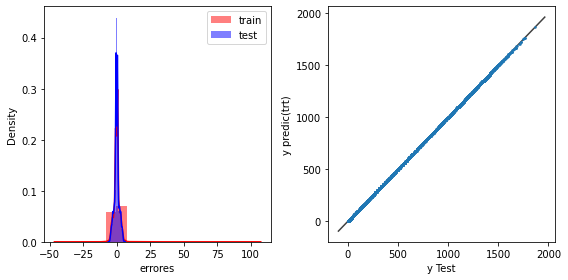

In [64]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.histplot( y_train - y_train_pred,  bins = 20, label = 'train', kde=True, stat="density", linewidth=0, color = "r")
sns.histplot(y_test - y_test_pred, bins = 20, label = 'test', kde=True, stat="density", linewidth=0, color = "b" )
plt.xlabel('errores')
plt.legend()

# hacemos un .plot  para graficar nuestro modelo de Arboles de desicion como es su aproximacion de prediccion 
ax = plt.subplot(1,2,2)
ax.scatter(y_test, y_test_pred, s = 2)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
ax.plot(lims, lims, 'k-', alpha= 0.75, zorder= 0)
plt.xlabel('y Test')
plt.ylabel('y predic(trt)')

plt.tight_layout()
plt.show()

*  En el modelo de arbol de decision con profundidad 8, se observa que en los resultados del error la diferencia es minima entre test y train. Podemos evidenciar que todos los datos estan sobre cero, la varianza esta muy cerca a cero y la comparativa entre el target original y el predicho los datos no se encuentran tan dispersos mostrandonos que existe overffiting.

* Creamos varios modelos para hacer pruebas y ver cual es el que mejor predice

In [65]:
lr = LinearRegression()

gbm = GradientBoostingRegressor(n_estimators=100, subsample=0.7,
                                learning_rate=0.08, random_state=42)

rf = RandomForestRegressor(max_depth=2, n_estimators=100, random_state=42)

* Ejecutamos un crosvalidate para ver cual es el que mejor predice

In [66]:
mae = {}

mae['lr'] = -cross_val_score(estimator=lr,
                            X=X_train, y=y_train, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

mae["gradient_boosting"] = -cross_val_score(estimator=gbm, X=X_train, y=y_train,
                                            cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
                                            
mae['rf'] = -cross_val_score(estimator=rf,
                            X=X_train, y=y_train, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [67]:
mae= pd.DataFrame(mae)
mae

,lr,gradient_boosting,rf
0,1.362887e-11,1.811471,83.217040
1,8.923964e-12,1.750504,86.807465
2,3.875610e-13,1.750858,73.367968
3,1.011645e-11,1.652798,76.272292
4,2.250628e-12,1.654517,79.321111


* Se validan los resultados y se evidencia que el mas cercano a cero es el gradient_boosting

In [68]:
#calculamos la media y la standard
resultados = pd.concat(objs=[pd.DataFrame(mae.mean(), columns=["Media"]),
                             pd.DataFrame(mae.std(), columns=["Desviacion estandar"])], axis=1)



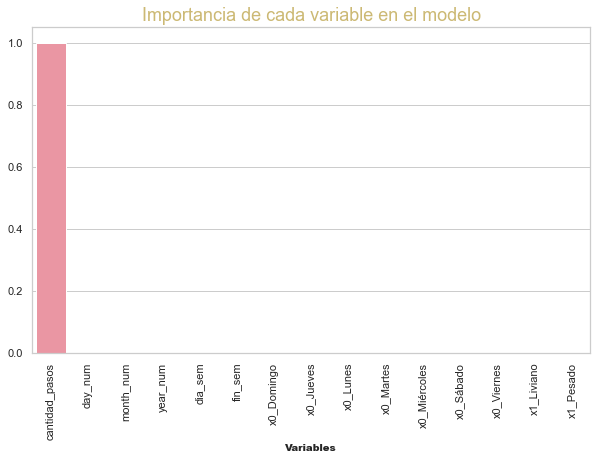

In [69]:
Modelo_completo = GradientBoostingRegressor(max_depth = 4)
Modelo_completo.fit(X_train,y_train)
y_test_pred = Modelo_completo.predict(X_test)
y_train_pred = Modelo_completo.predict(X_train)

importances = Modelo_completo.feature_importances_
columns = X_train.columns

plt.figure(figsize = (10, 6))
sns.set_theme(style="whitegrid")
sns.barplot(columns, importances)
plt.xlabel("Variables", fontweight = "black", fontsize = 10)
plt.title("Importancia de cada variable en el modelo", fontsize = 18, color = "y")
plt.xticks(rotation= 90)
plt.show()

* La variable mas importante para el modelo es la cantidad de pasos.

In [70]:
#Hacemos pruebas de hiperparametros para identificar la mejor prediccion
param_grid = {
    'loss': ['ls', 'lad', 'huber'],
    'n_estimators': [50, 100, 150],
    'criterion': ["friedman_mse", "mse"],
    "subsample": [0.5, 0.7, 1.0],
    'max_features': [None, "sqrt"]
}

gb_cv = GridSearchCV(estimator=gbm, param_grid=param_grid, scoring="neg_mean_absolute_error", cv=5, n_jobs=-1)

gb_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(learning_rate=0.08,
                                                 random_state=42,
                                                 subsample=0.7),
             n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'mse'],
                         'loss': ['ls', 'lad', 'huber'],
                         'max_features': [None, 'sqrt'],
                         'n_estimators': [50, 100, 150],
                         'subsample': [0.5, 0.7, 1.0]},
             scoring='neg_mean_absolute_error')

In [71]:
print(f'Los mejores hiperparametros son: \n')
for key, value in gb_cv.best_params_.items():
    print(f'{key}: {value}')
print(f'El error absoluto medio más bajo es: {np.round(-gb_cv.best_score_, 2)}')

Los mejores hiperparametros son: 

criterion: friedman_mse
loss: ls
max_features: None
n_estimators: 150
subsample: 1.0
El error absoluto medio más bajo es: 1.57


In [72]:
gbm = gb_cv.best_estimator_

print(f"El mae en datos no observados es: {mean_absolute_error(y_test, gbm.predict(X_test))}")

El mae en datos no observados es: 1.4158706503187612


In [73]:
#filtramos el dataset
pre = orignal.filter(items=['fecha','cantidad_pasos'])

In [74]:
# Renombramos la columna cantidad de pasos para diferenciarla de la predicha
pre=pre.rename(columns={'cantidad_pasos': 'cantidad_pasos_original'})

In [75]:
#Imprimimos
test_data

,resid
fecha,
2017-01-04,2458.432846
2017-01-05,3811.079188
2017-01-06,1935.646216
2017-01-07,-6028.344805
2017-01-08,-7395.027335
...,...
2019-12-24,-10363.641441
2019-12-25,-10829.995726
2019-12-26,2753.364902


In [76]:
#Unimmos los datasets para comparar la prediccion con la cantidad de pasos
test_data = pd.concat(objs=[pd.DataFrame(gbm.predict(X_test), columns=["prediction"]),
                            pre.reset_index(drop=True)], axis=1)

test_data.head()

,prediction,fecha,cantidad_pasos_original
0,360.646997,2019-01-01 02:00:00,537
1,8.993790,2019-01-01 02:00:00,1
2,379.206817,2019-01-01 02:00:00,443
3,14.932152,2019-01-01 02:00:00,1
4,334.116902,2019-01-01 03:00:00,769


In [77]:
#Iniciamos el indice por orden de fecha
test_data.set_index("fecha", inplace=True)

In [78]:
#Eliminamos datos nulos
test_data.dropna(inplace = True) 

In [79]:
#Imprimimos la prediccion y los datos originales
test_data

,prediction,cantidad_pasos_original
fecha,,
2019-01-01 02:00:00,360.646997,537
2019-01-01 02:00:00,8.993790,1
2019-01-01 02:00:00,379.206817,443
2019-01-01 02:00:00,14.932152,1
2019-01-01 03:00:00,334.116902,769
...,...,...
2019-03-04 09:00:00,2.190833,39
2019-03-04 10:00:00,556.202045,1340
2019-03-04 10:00:00,1.409945,36


* Se evidencia que al ser el mejor modelo para predecir aun seguimos viendo una brecha alta para predecir.

## Pregunta

Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
* Se utiliza todo el tratamiento de datos y prediccion que se uso en el inicion del notebook y se aplica un modelo para observar su comportamiento.  

In [80]:
data_2020 = pd.read_csv(r'flujo-vehicular-2020.csv', sep =',')
data_2020.head()

,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos
0,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Efectivo,Efectivo,Centro,24.0
1,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Efectivo,Efectivo,Provincia,80.0
2,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en Infracción,Provincia,1.0
3,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Centro,1.0
4,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Provincia,1.0


In [81]:
print(data_2020['estacion'].unique())

['ALBERDI' 'AVELLANEDA' 'DELLEPIANE LINIERSLEPIANE CENTRO'
 'DELLEPIANE LINIERS' 'ILLIA' 'ILP' 'PB1' 'PB3' 'PB4' 'RETIRO' 'SALGUERO'
 'SARMIENTO' 'PB2']


In [82]:
print(data_2020['forma_pago'].unique())

['Efectivo' 'Rec.Deuda' 'Tarjeta Magnética' 'Tag' 'Exento' 'Violación'
 'CPP' 'Mercado Pago']


In [83]:
mask = np.logical_and(data_2020.estacion=='ILLIA', data_2020.forma_pago == 'Efectivo')
data_2020 = data_2020[mask]
data_2020

,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos
52,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ILLIA,Auto,Efectivo,Efectivo,Centro,326.0
53,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ILLIA,Auto,Efectivo,Efectivo,Provincia,319.0
134,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,1.0,2.0,ILLIA,Auto,Efectivo,Efectivo,Centro,199.0
135,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,1.0,2.0,ILLIA,Auto,Efectivo,Efectivo,Provincia,180.0
202,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,2.0,3.0,ILLIA,Auto,Efectivo,Efectivo,Centro,114.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2532216,2020.0,2020-12-24,diciembre,Jueves,24.0,11.0,12.0,ILLIA,Pesados 6 Ejes,Efectivo,Efectivo,Provincia,1.0
2532227,2020.0,2020-12-24,diciembre,Jueves,24.0,12.0,13.0,ILLIA,Pesados 6 Ejes,Efectivo,Efectivo,Provincia,1.0
2532271,2020.0,2020-12-24,diciembre,Jueves,24.0,17.0,18.0,ILLIA,Pesados 6 Ejes,Efectivo,Efectivo,Centro,1.0
2532928,2020.0,2020-12-28,diciembre,Lunes,28.0,12.0,13.0,ILLIA,Pesados 6 Ejes,Efectivo,Efectivo,Provincia,1.0


In [84]:
data_2020.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion','dia_fecha'], inplace = True)
data_2020

,fecha,mes,dia,hora_fin,tipo_vehiculo,observacion,sentido,cantidad_pasos
52,2020-01-01 00:00:00,enero,Miércoles,1.0,Auto,Efectivo,Centro,326.0
53,2020-01-01 00:00:00,enero,Miércoles,1.0,Auto,Efectivo,Provincia,319.0
134,2020-01-01 00:00:00,enero,Miércoles,2.0,Auto,Efectivo,Centro,199.0
135,2020-01-01 00:00:00,enero,Miércoles,2.0,Auto,Efectivo,Provincia,180.0
202,2020-01-01 00:00:00,enero,Miércoles,3.0,Auto,Efectivo,Centro,114.0
...,...,...,...,...,...,...,...,...
2532216,2020-12-24,diciembre,Jueves,12.0,Pesados 6 Ejes,Efectivo,Provincia,1.0
2532227,2020-12-24,diciembre,Jueves,13.0,Pesados 6 Ejes,Efectivo,Provincia,1.0
2532271,2020-12-24,diciembre,Jueves,18.0,Pesados 6 Ejes,Efectivo,Centro,1.0
2532928,2020-12-28,diciembre,Lunes,13.0,Pesados 6 Ejes,Efectivo,Provincia,1.0


In [85]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
data_2020['fecha2'] = pd.to_datetime(data_2020.fecha) + pd.to_timedelta(data_2020.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
data_2020.drop(columns=['fecha','hora_fin'], inplace = True)

data_2020.head()

,mes,dia,tipo_vehiculo,observacion,sentido,cantidad_pasos,fecha2
52,enero,Miércoles,Auto,Efectivo,Centro,326.0,2020-01-01 01:00:00
53,enero,Miércoles,Auto,Efectivo,Provincia,319.0,2020-01-01 01:00:00
134,enero,Miércoles,Auto,Efectivo,Centro,199.0,2020-01-01 02:00:00
135,enero,Miércoles,Auto,Efectivo,Provincia,180.0,2020-01-01 02:00:00
202,enero,Miércoles,Auto,Efectivo,Centro,114.0,2020-01-01 03:00:00


In [86]:
#Corregimos el nombre de fecha2 a fecha
data_2020.rename(columns = {'fecha2':'fecha'}, inplace = True) 
data_2020.head()

,mes,dia,tipo_vehiculo,observacion,sentido,cantidad_pasos,fecha
52,enero,Miércoles,Auto,Efectivo,Centro,326.0,2020-01-01 01:00:00
53,enero,Miércoles,Auto,Efectivo,Provincia,319.0,2020-01-01 01:00:00
134,enero,Miércoles,Auto,Efectivo,Centro,199.0,2020-01-01 02:00:00
135,enero,Miércoles,Auto,Efectivo,Provincia,180.0,2020-01-01 02:00:00
202,enero,Miércoles,Auto,Efectivo,Centro,114.0,2020-01-01 03:00:00


In [87]:
original=data_2020.copy()

In [88]:
#Reordenamos el dataset por fecha
data_2020.sort_values('fecha', inplace = True)
data_2020.reset_index(drop=True, inplace = True)
data_2020

,mes,dia,tipo_vehiculo,observacion,sentido,cantidad_pasos,fecha
0,enero,Miércoles,Moto,Efectivo,Centro,7.0,2020-01-01 00:00:00
1,enero,Miércoles,Auto,Efectivo,Provincia,423.0,2020-01-01 00:00:00
2,enero,Miércoles,Auto,Efectivo,Centro,467.0,2020-01-01 00:00:00
3,enero,Miércoles,Moto,Efectivo,Provincia,6.0,2020-01-01 00:00:00
4,enero,Miércoles,Pesados 2 Ejes,Efectivo,Centro,1.0,2020-01-01 00:00:00
...,...,...,...,...,...,...,...
52369,diciembre,Jueves,Auto,Efectivo,Provincia,222.0,2020-12-31 20:00:00
52370,diciembre,Jueves,Auto,Efectivo,Provincia,106.0,2020-12-31 21:00:00
52371,diciembre,Jueves,Moto,Efectivo,Centro,5.0,2020-12-31 21:00:00
52372,diciembre,Jueves,Moto,Efectivo,Provincia,1.0,2020-12-31 21:00:00


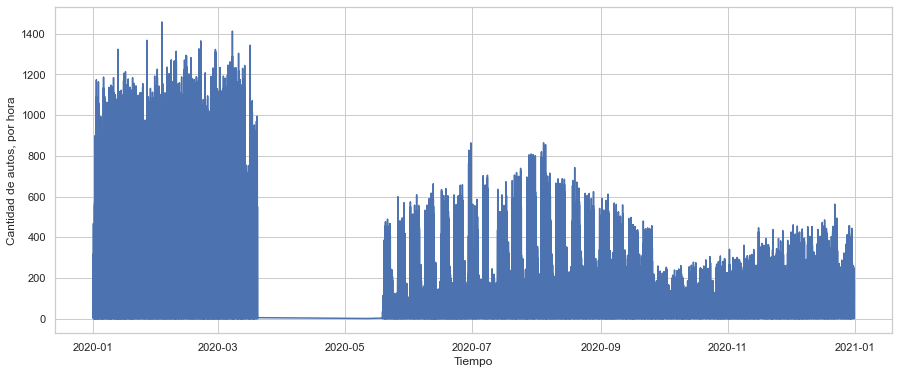

In [89]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(data_2020.fecha, data_2020.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

In [90]:
diario2020 = data_2020.resample('D', on = 'fecha').sum()
print(diario2020.shape)
diario2020.head()

(366, 1)


,cantidad_pasos
fecha,
2020-01-01,21395.0
2020-01-02,33722.0
2020-01-03,37067.0
2020-01-04,30627.0
2020-01-05,27812.0


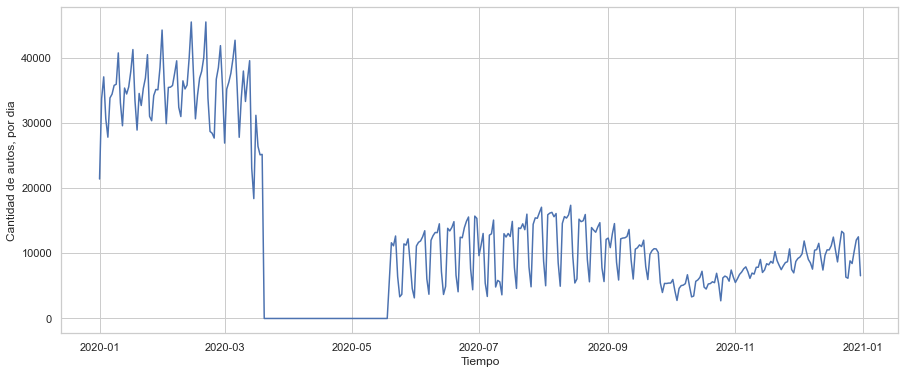

In [91]:
#Se grafica la serie de tiempo peaje Illia con la cantidad de pasos por año y por día.
plt.figure(figsize = (15,6))
plt.plot(diario2020.index, diario2020.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

In [92]:
imputer = SimpleImputer(missing_values=0, strategy='mean')

In [93]:
diario2020.cantidad_pasos =imputer.fit_transform(diario2020['cantidad_pasos'].values.reshape(-1,1))[:,0]

In [94]:
diario2020[diario2020['cantidad_pasos']==0]

,cantidad_pasos
fecha,


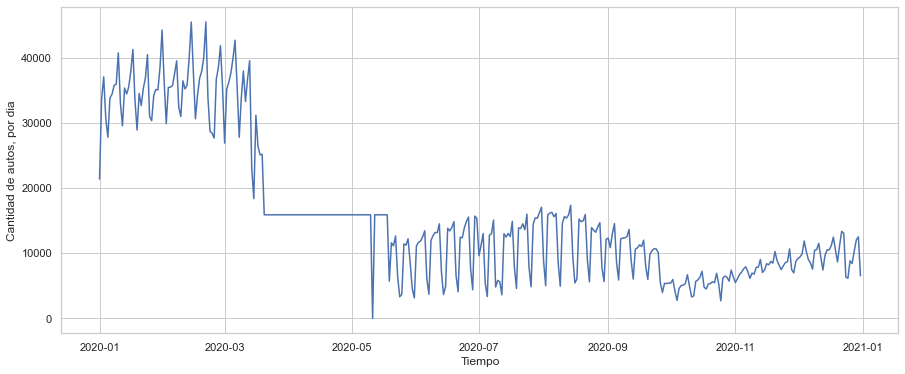

In [95]:
#Graficamos de nuevo despues de tratar los valores atipicos.
plt.figure(figsize = (15,6))
plt.plot(diario2020.index, diario2020.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

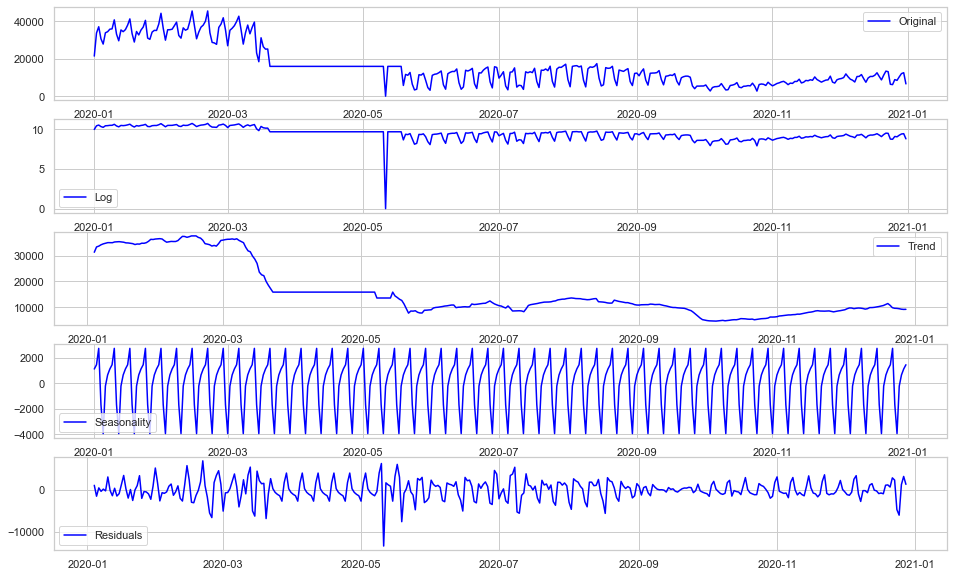

In [96]:
descomposicion = seasonal_decompose(diario2020)

trend2020 = descomposicion.trend
seasonal2020 = descomposicion.seasonal
residual2020 = descomposicion.resid

plt.figure(figsize=(16,10))
plt.subplot(511)
plt.plot(diario2020, label='Original', color="blue")
plt.legend(loc='best')
plt.subplot(512)
plt.plot(np.log(diario2020), label='Log', color="blue")
plt.legend(loc='best')
plt.subplot(513)
plt.plot(trend2020, label='Trend', color="blue")
plt.legend(loc='best')
plt.subplot(514)
plt.plot(seasonal2020, label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(515)
plt.plot(residual2020, label='Residuals', color="blue")
plt.legend(loc='best')

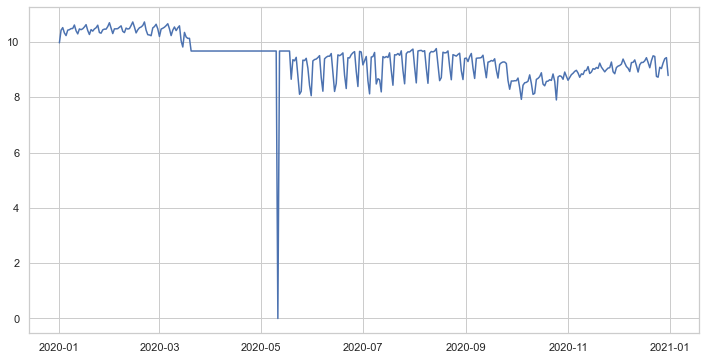

In [97]:
#Se usa el log para convertir en algoritmo la variable diario.
ts_log2020 = np.log(diario2020)
plt.figure(figsize=(12,6))
plt.plot(ts_log2020)

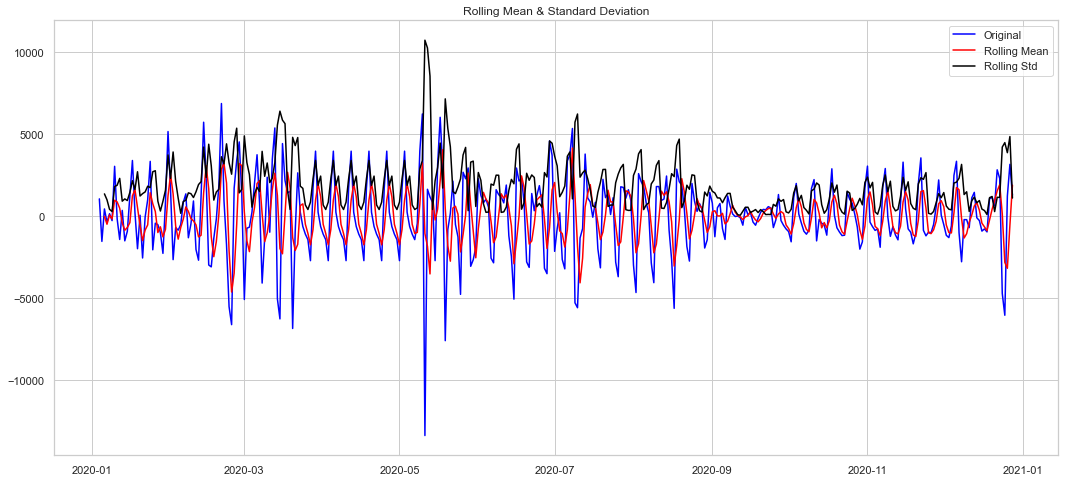

Results of Dickey-Fuller Test:
Test Statistic                -8.003324e+00
p-value                        2.302654e-12
#Lags Used                     1.400000e+01
Number of Observations Used    3.450000e+02
Critical Value (1%)           -3.449447e+00
Critical Value (5%)           -2.869954e+00
Critical Value (10%)          -2.571253e+00
dtype: float64


In [98]:
ts_log_decompose2020 =  pd.DataFrame(residual2020)
ts_log_decompose2020.dropna(inplace=True)
test_stationarity(ts_log_decompose2020,"resid")



### Predicciones con ARIMA 

In [99]:
lag_acf = acf(ts_log_decompose2020, nlags=30)
lag_pacf = pacf(ts_log_decompose2020, nlags=30, method='ols')

Text(0.5, 1.0, 'Función de autocorrelación')

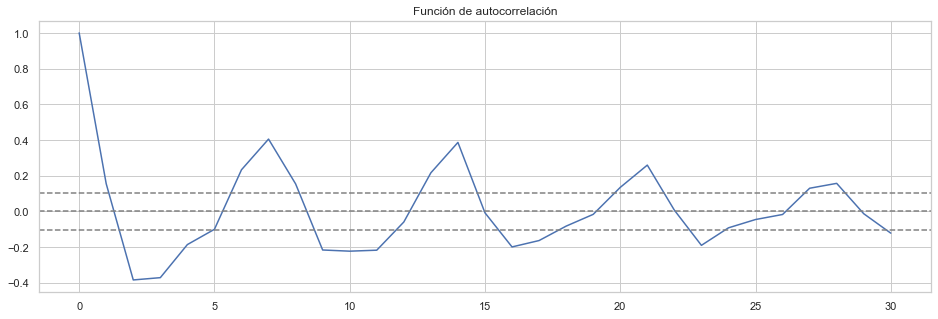

In [100]:
#Plot ACF: 
plt.figure(figsize=(16,5))
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_decompose2020)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_decompose2020)),linestyle='--',color='gray')
plt.title('Función de autocorrelación')

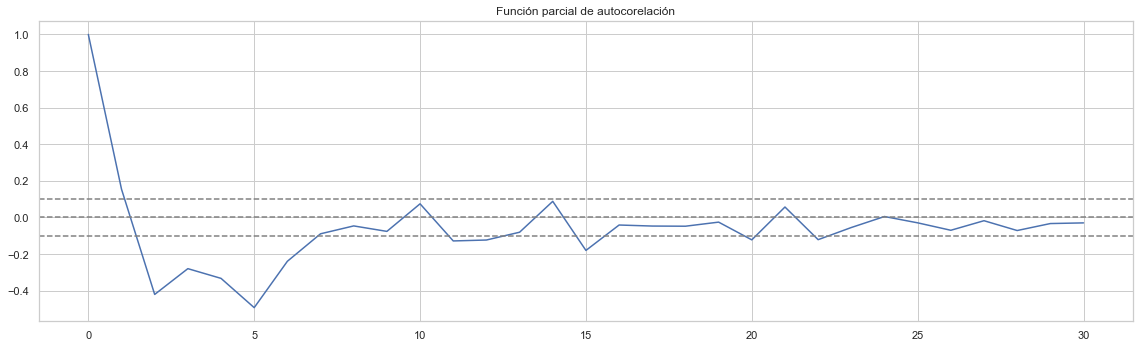

In [101]:
#Plot PACF:
plt.figure(figsize=(16,5))
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_decompose2020)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_decompose2020)),linestyle='--',color='gray')
plt.title('Función parcial de autocorelación')
plt.tight_layout()

                               SARIMAX Results                                
Dep. Variable:                  resid   No. Observations:                 1089
Model:                 ARIMA(5, 0, 0)   Log Likelihood              -10420.072
Date:                Sun, 05 Dec 2021   AIC                          20854.144
Time:                        23:26:16   BIC                          20889.095
Sample:                    01-04-2017   HQIC                         20867.373
                         - 12-28-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8045     40.822      0.093      0.926     -76.206      83.815
ar.L1         -0.2910      0.025    -11.570      0.000      -0.340      -0.242
ar.L2         -0.4801      0.028    -17.387      0.0

Text(0.5, 1.0, 'RSS: 13048097547.9803')

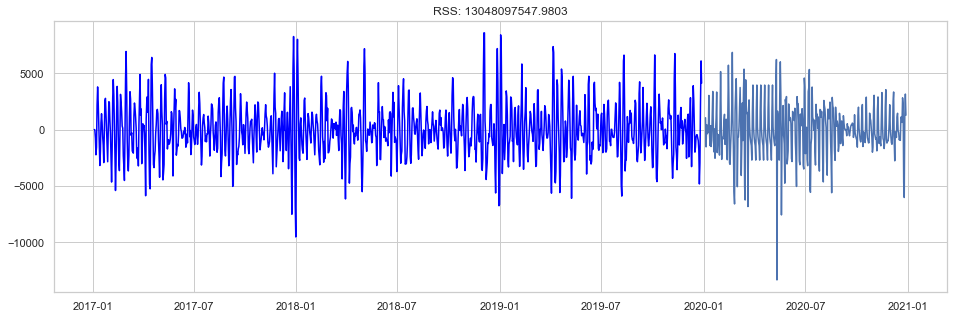

In [102]:
model = ARIMA(ts_log_decompose, order=(5, 0, 7))
results_MA2020 = model.fit()
print(results_MA.summary())

plt.figure(figsize=(16,5))
plt.plot(ts_log_decompose2020)
plt.plot(results_MA.fittedvalues, color='blue')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_decompose.resid)**2))

In [103]:
# Se separan los datos en conjuntos de entrenamiento y prueba.

training_data2020=ts_log_decompose2020
test_data2020=ts_log_decompose2020

In [104]:
# Se generan las predicciones para la cantidad de periodos del conjunto de testeo:

predictions2020=results_MA2020.forecast(steps=len(test_data2020))[0]
predictions

2496.3572401928423

In [105]:
#traemos los pasos del dataset original
resultado_var_2020 = diario2020
resultado_var_2020.head()

,cantidad_pasos
fecha,
2020-01-01,21395.0
2020-01-02,33722.0
2020-01-03,37067.0
2020-01-04,30627.0
2020-01-05,27812.0


In [106]:
diario2020['cant_pasos_dif'] = diario2020['cantidad_pasos'] - diario2020['cantidad_pasos'].shift(5)
diario2020.head(2)

,cantidad_pasos,cant_pasos_dif
fecha,,
2020-01-01,21395.0,NaN
2020-01-02,33722.0,NaN


In [107]:
#se calcula la diferencia de los pasos en rangos
resultado_var_2020['Shift7'] = resultado_var_2020['cantidad_pasos']-resultado_var_2020['cant_pasos_dif']
resultado_var_2020.head()

,cantidad_pasos,cant_pasos_dif,Shift7
fecha,,,
2020-01-01,21395.0,NaN,NaN
2020-01-02,33722.0,NaN,NaN
2020-01-03,37067.0,NaN,NaN
2020-01-04,30627.0,NaN,NaN
2020-01-05,27812.0,NaN,NaN


In [108]:
#asiganmos la prediccion a todas las instancias
resultado_var_2020['predictions'] = predictions
resultado_var_2020.head()

,cantidad_pasos,cant_pasos_dif,Shift7,predictions
fecha,,,,
2020-01-01,21395.0,NaN,NaN,2496.35724
2020-01-02,33722.0,NaN,NaN,2496.35724
2020-01-03,37067.0,NaN,NaN,2496.35724
2020-01-04,30627.0,NaN,NaN,2496.35724
2020-01-05,27812.0,NaN,NaN,2496.35724


In [109]:
#sumamos el resultado de la prediccion
resultado_var_2020['pred_var_original'] = resultado_var_2020['predictions'] + resultado_var_2020['Shift7']
resultado_var_2020.head()

,cantidad_pasos,cant_pasos_dif,Shift7,predictions,pred_var_original
fecha,,,,,
2020-01-01,21395.0,NaN,NaN,2496.35724,NaN
2020-01-02,33722.0,NaN,NaN,2496.35724,NaN
2020-01-03,37067.0,NaN,NaN,2496.35724,NaN
2020-01-04,30627.0,NaN,NaN,2496.35724,NaN
2020-01-05,27812.0,NaN,NaN,2496.35724,NaN


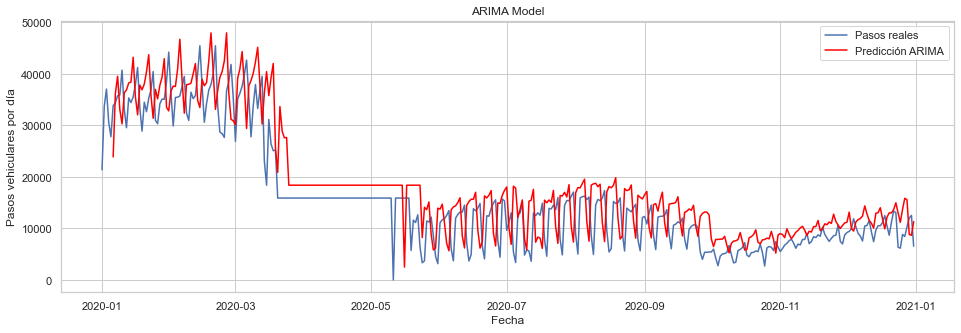

In [110]:
plt.figure(figsize=(16,5))
plt.plot(resultado_var_2020['cantidad_pasos'], label='Pasos reales')
plt.plot(resultado_var_2020['pred_var_original'], color='red', label='Predicción ARIMA')
plt.title('ARIMA Model')
plt.xlabel('Fecha')
plt.ylabel('Pasos vehiculares por día')
plt.legend()
plt.show()

* En la grafica se observa que entre el test y train no hay mucha diferencia, sigue la tendencia a la baja desde el inicio de 2020 hasta inicio de 2021, varios factores, la pandemia que genero una cuarentena y sigue decreciendo de manera estable, ya sea por no usar efectivo por el virus impulsando el metodo de pago de TelePase

### Conclusiones:

* Los modelos utilizados permiten predecir con eficacia con algunas limitaciones, como predicciones que se pueden hacer solamente por semana, no se puede con dos tipos como semanal y mensual.

* La predicción es sobre la diferencia de 7 días en los pasos por la cabina Illia.

* No se considera utilizar los datos de 2017, 2018, 2019 para predecir 2020 ya que como se observa en los gráficos anteriores, vemos que 2020 es un año atípico que afectaria los años anteriores, por lo cual la información de los años anteriores no se puede utilizar para predecir el futuro incluyendo el año 2020.

